In [474]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("white")
import numpy as np

data = pd.read_csv('a1-burtin.csv', index_col = 0)

In [519]:
data.columns = ["Penicillin", "Streptomycin", "Neomycin", "GramStaining"]
data["Penicillin"] = data["Penicillin"].map(float)
data["Streptomycin"] = data["Streptomycin"].map(float)
data["Neomycin"] = data["Neomycin"].map(float)

data

,Penicillin,Streptomycin,Neomycin,GramStaining
Bacteria,,,,
Aerobacter aerogenes,870.000,1.00,1.600,negative
Brucella abortus,1.000,2.00,0.020,negative
Brucella anthracis,0.001,0.01,0.007,positive
Diplococcus pneumoniae,0.005,11.00,10.000,positive
Escherichia coli,100.000,0.40,0.100,negative
Klebsiella pneumoniae,850.000,1.20,1.000,negative
Mycobacterium tuberculosis,800.000,5.00,2.000,negative
Proteus vulgaris,3.000,0.10,0.100,negative
Pseudomonas aeruginosa,850.000,2.00,0.400,negative


In [476]:
data.GramStaining.value_counts()
data.GramStaining.unique()

array(['negative', 'positive'], dtype=object)

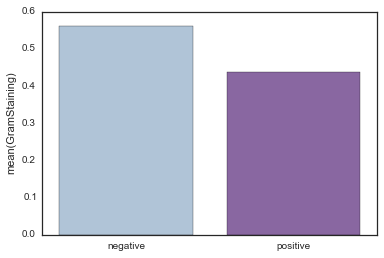

In [477]:
sns.barplot(x=data.GramStaining.unique(), y=data.GramStaining.value_counts(normalize=True), data=data, palette="BuPu")

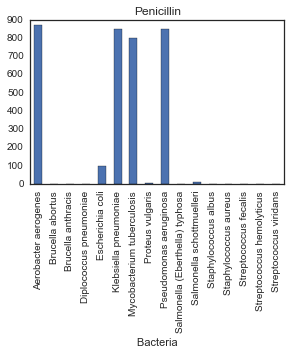

In [478]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(yscale="log")
fig_dims = (3,2)
plt.subplot2grid(fig_dims, (0, 0))
data['Penicillin'].plot(kind="bar", title="Penicillin")

In [479]:
s1 = data.stack()
s1

Bacteria                                      
Aerobacter aerogenes              Penicillin           870
                                  Streptomycin           1
                                  Neomycin             1.6
                                  GramStaining    negative
Brucella abortus                  Penicillin             1
                                  Streptomycin           2
                                  Neomycin            0.02
                                  GramStaining    negative
Brucella anthracis                Penicillin         0.001
                                  Streptomycin        0.01
                                  Neomycin           0.007
                                  GramStaining    positive
Diplococcus pneumoniae            Penicillin         0.005
                                  Streptomycin          11
                                  Neomycin              10
                                  GramStaining    positive
Escherich

In [480]:
copy = data[["Penicillin", "Streptomycin", "Neomycin"]]
copy = copy.stack(0).reset_index(1)
result = pd.concat([copy, data["GramStaining"]], axis=1, join='inner')
result.columns = ["Drug", "Value", "Gram"]
result

,Drug,Value,Gram
Bacteria,,,
Aerobacter aerogenes,Penicillin,870.000,negative
Aerobacter aerogenes,Streptomycin,1.000,negative
Aerobacter aerogenes,Neomycin,1.600,negative
Brucella abortus,Penicillin,1.000,negative
Brucella abortus,Streptomycin,2.000,negative
Brucella abortus,Neomycin,0.020,negative
Brucella anthracis,Penicillin,0.001,positive
Brucella anthracis,Streptomycin,0.010,positive
Brucella anthracis,Neomycin,0.007,positive


Index([u'Aerobacter aerogenes', u'Aerobacter aerogenes',
       u'Aerobacter aerogenes', u'Brucella abortus', u'Brucella abortus',
       u'Brucella abortus', u'Brucella anthracis', u'Brucella anthracis',
       u'Brucella anthracis', u'Diplococcus pneumoniae',
       u'Diplococcus pneumoniae', u'Diplococcus pneumoniae',
       u'Escherichia coli', u'Escherichia coli', u'Escherichia coli',
       u'Klebsiella pneumoniae', u'Klebsiella pneumoniae',
       u'Klebsiella pneumoniae', u'Mycobacterium tuberculosis',
       u'Mycobacterium tuberculosis', u'Mycobacterium tuberculosis',
       u'Proteus vulgaris', u'Proteus vulgaris', u'Proteus vulgaris',
       u'Pseudomonas aeruginosa ', u'Pseudomonas aeruginosa ',
       u'Pseudomonas aeruginosa ', u'Salmonella (Eberthella) typhosa ',
       u'Salmonella (Eberthella) typhosa ',
       u'Salmonella (Eberthella) typhosa ', u'Salmonella schottmuelleri ',
       u'Salmonella schottmuelleri ', u'Salmonella schottmuelleri ',
       u'Staphylococcu

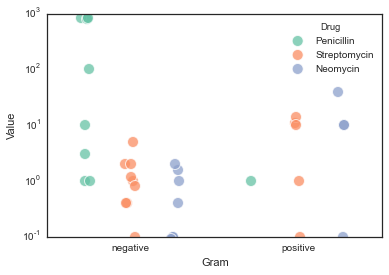

In [481]:
g = sns.stripplot(x ="Gram", y="Value", data=result, jitter=True, hue="Drug", palette="Set2", alpha=0.75, size=11)
g.set(yscale="log")

result.index

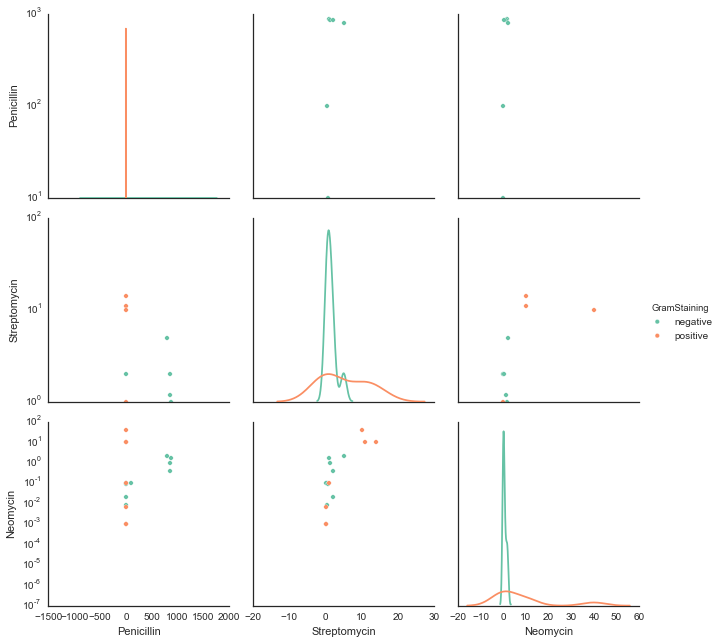

In [482]:
g2 = sns.pairplot(data, size=3, hue="GramStaining", palette="Set2", diag_kind="kde")
g2.set(yscale="log")

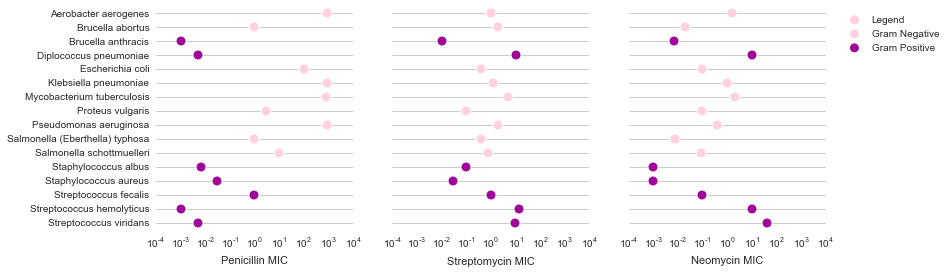

In [525]:
data3 = data[:]

fig, ax = plt.subplots(figsize=(12, 4))
fig_dims = (1,3)
plt.subplot2grid(fig_dims, (0, 0))

sns.set(style="whitegrid")

g3 = sns.stripplot(x="Penicillin", y=data3.index, orient="h", data=data3, 
                   size=10, palette=sns.xkcd_palette(["light pink", "barney purple"]), hue="GramStaining", split=False)
g3.set(xscale="log", xlim=(10**-4, 10**4), ylabel="", xlabel="Penicillin MIC")

g3.axes.xaxis.grid(False)
g3.axes.yaxis.grid(True)
g3.legend_.remove()

sns.despine(left=True, bottom=True)

#Second Plot
plt.subplot2grid(fig_dims, (0, 1))

sns.set(style="whitegrid")

g4 = sns.stripplot(x="Streptomycin", y=data3.index, orient="h", data=data3, 
                   size=10, palette=sns.xkcd_palette(["light pink", "barney purple"]), hue="GramStaining", split=False)
g4.set(xscale="log", xlim=(10**-4, 10**4), ylabel="", xlabel="Streptomycin MIC")
g4.set_yticklabels([])

g4.axes.xaxis.grid(False)
g4.axes.yaxis.grid(True)
g4.legend_.remove()

sns.despine(left=True, bottom=True)

#Third Plot
plt.subplot2grid(fig_dims, (0, 2))

sns.set(style="whitegrid")

g44 = sns.stripplot(x="Neomycin", y=data3.index, orient="h", data=data3, 
                   size=10, palette=sns.xkcd_palette(["light pink", "barney purple"]), hue="GramStaining", split=False)
g44.set(xscale="log", xlim=(10**-4, 10**4), ylabel="", xlabel="Neomycin MIC")
g44.set_yticklabels([])

g44.axes.xaxis.grid(False)
g44.axes.yaxis.grid(True)

plt.legend(["Legend", "Gram Negative", "Gram Positive"], bbox_to_anchor=(1.05, 1), loc=2)

sns.despine(left=True, bottom=True)

#Notes
#Having it in alphabetical does not really do much over alphabetical by GramStaining

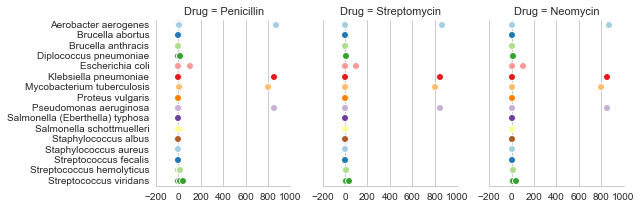

In [484]:
data4 = result
g5 = sns.FacetGrid(data4, col="Drug")
g5.map(sns.stripplot, x="Value", y=data4.index, data=data4, palette="Paired")
#g5.set(xscale="log")